<h1>Approximately 40,000 people die as a result of suicide each year in the United States, making it the 10th leading cause of death in the nation.</h1>

<h3>First, I was curious if I could find a link to social media.</h3>

In [ ]:
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from bs4 import BeautifulSoup

In [27]:
!which chromedriver

/usr/local/bin/chromedriver


In [28]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [29]:
import pandas as pd

In [30]:
states = pd.read_csv('states.csv')
states.head()

,state
0,alabama
1,alaska
2,arizona
3,arkansas
4,california


In [37]:
stat_list = []
state_list = []

state_list = states['state'].tolist()

<h3>I tried to create a pseudo-API guessing that I could cycle through the URL with state name as a variable
I was wrong.</h3>

In [ ]:
url_list = []
for state in state_list:
    url_list.append(f'https://napoleoncat.com/blog/en/instagram-users-in-{state}-state-in-the-us-november-2016/?utm_source=NapoBlog&utm_campaign=201612_Insta_states_in_USA&utm_medium=owned&utm_content=art')

In [5]:
# for url in url_list:
#     browser.visit(url)
#     html = browser.html
#     soup = BeautifulSoup(html, 'html.parser')

#     find_div = soup.find('div', class_='intro')

#     find_para = find_div.find('p').getText()

#     stat_list.append(find_para)

# print(states_and_stats)
#try:
#     for title_url in titles_and_urls:
#         browser.click_link_by_partial_text('next')
# except ElementDoesNotExist:
#     print("Scraping Complete")

<h2>The only data I could find by state for IG was a site called NapoleonCat.com, which had 2016 data available page by page.</h2>

In [42]:
url = 'https://napoleoncat.com/blog/en/instagram-users-in-alabama-state-in-the-us-november-2016/?utm_source=NapoBlog&utm_campaign=201612_Insta_states_in_USA&utm_medium=owned&utm_content=art'
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
find_div = soup.find('div', class_='intro')
find_para = find_div.find('p').getText()
stat_list.append(find_para)
stat_list
stat_list

[<p>There are 1.2M Instagram users in Alabama state in the United States. Only 41% are male. Over 80% are younger than 45.</p>,
 <p><img alt="" class="aligncenter size-full wp-image-8171" height="1200" sizes="(max-width: 1200px) 100vw, 1200px" src="https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1.jpg" srcset="https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1.jpg 1200w, https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1-150x150.jpg 150w, https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1-300x300.jpg 300w, https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1-768x768.jpg 768w, https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1-1024x1024.jpg 1024w, https://napoleoncat.com/blog/wp-content/uploads/2018/12/napoleon_1200x1200_selfies3-1-624x624.jpg 624w" width="1200"/></p>,
 <p><img alt

<h3>I was able to pull the data above into Excel and pull the numbers and format the strings to a more useful format.</h3>

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [7]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from homemade.linear_regression import LinearRegression

In [9]:
data = pd.read_csv('data/IG_Suicide_Final.csv')
data.head()

,states,user_total_num,SUICIDE_RATE,TOTAL_DEATHS,state_population,IG_user_rate,unemployment_rate,Gun_Ownership,Violent_Crime,google_search_rate
0,alabama,"1,200,000",15.7,788,4868535,0.246481,5.9,0.52,449.9,75
1,alaska,"160,000",25.8,193,725620,0.220501,6.9,0.58,603.2,100
2,arizona,"1,700,000",17.7,"1,271",6965367,0.244065,5.4,0.31,428.9,93
3,arkansas,"680,000",18.2,555,2957967,0.229888,3.9,0.55,469.1,80
4,california,"12,200,000",10.5,"4,294",39668381,0.307550,5.5,0.21,423.1,91


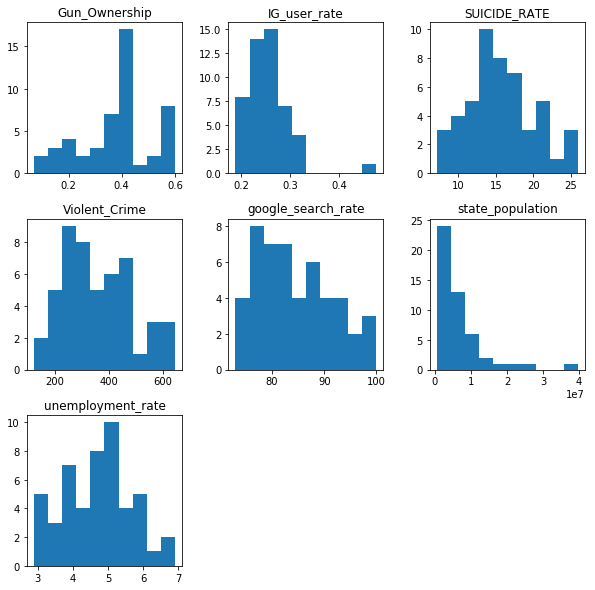

In [10]:
histograms = data.hist(grid=False, figsize=(10, 10))

<h1>Split the data into training and test data</h1>

In [12]:
#split the data into training and test data
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

<h1>Choose your columns</h1>

In [13]:
#match fields for comparison
input_param_name = 'IG_user_rate'
output_param_name = 'SUICIDE_RATE'

<h1>Split the Data into Input and Output</h1>

In [15]:
#split into input and output
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

In [16]:
#split test set input and output
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

<h1>Plot the data</h1>

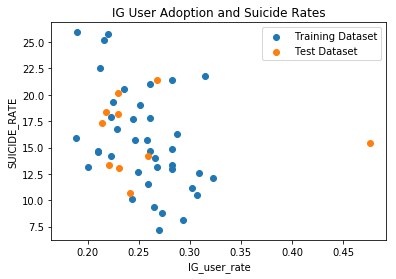

In [18]:
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('IG User Adoption and Suicide Rates')
plt.legend()
plt.show()

<h1>Not.Looking.Very.Good. R value -.29</h1>